In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
data = pd.read_csv('data/data_flats.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [130]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

In [131]:
import seaborn as sns
# fig, ax = plt.subplots(figsize=(20,12))
# sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

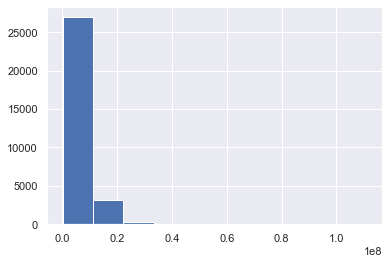

In [132]:
data.price_doc.hist()

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

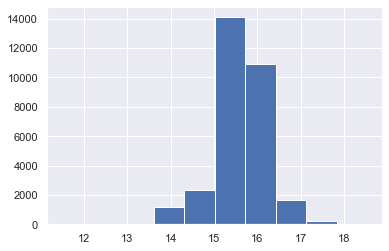

In [133]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

Отлично, выглядит уже лучше!

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

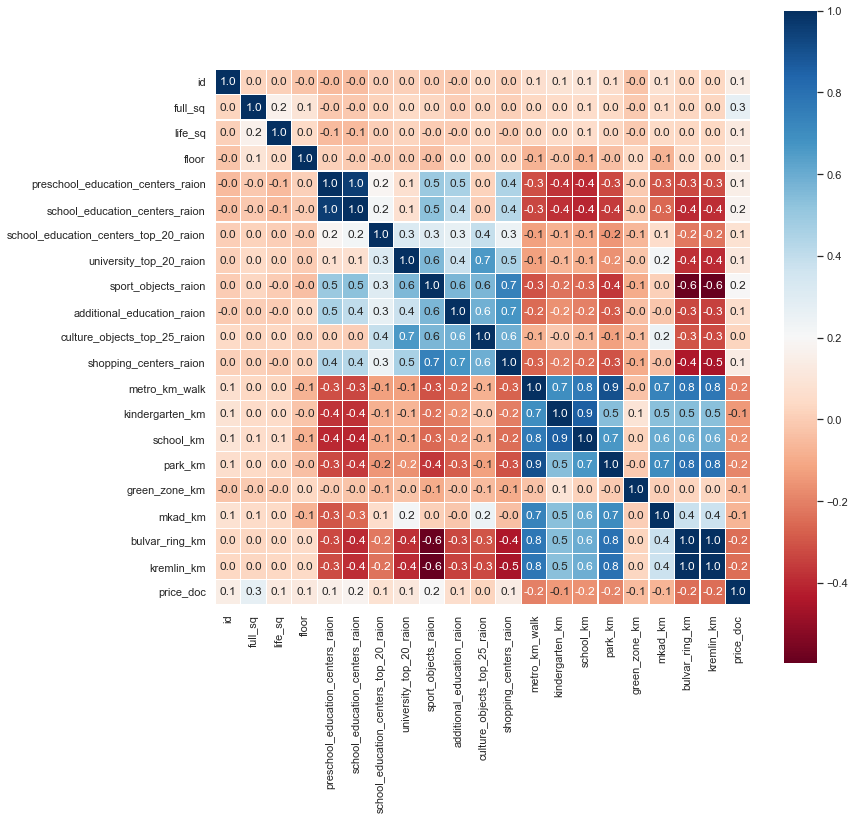

In [134]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Смотрим, у каких пар признаков сильная взаимосвязь:

1. Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
2. Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
3. Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
4. Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

In [135]:
# Удалите строки, где есть хотя бы один пропуск.
print(len(data))
data.drop(columns=['id','life_sq','preschool_education_centers_raion','kindergarten_km', 'park_km', 'kremlin_km'], inplace=True)
print(len(data))
data.dropna(axis=0, inplace=True)
print(len(data))

30469
30469
30277


In [136]:
y = data.price_doc
y

0        15.581952
1        15.607270
2        15.555977
3        16.388123
4        16.608603
           ...    
30464    15.816991
30465    17.034386
30466    15.757264
30467    16.418200
30468    15.538277
Name: price_doc, Length: 30277, dtype: float64

In [137]:
X = data.drop(columns=['price_doc'])
X

,full_sq,floor,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,school_km,green_zone_km,mkad_km,bulvar_ring_km
0,43,4.0,5,0,0,7,3,0,16,1.131260,0.177975,0.600973,1.422391,13.675657
1,34,3.0,8,0,0,6,1,1,3,0.635053,0.273345,0.065321,9.503405,8.132640
2,43,2.0,7,0,0,5,1,0,0,1.445960,0.158072,0.453172,5.604800,8.054252
3,89,9.0,10,0,0,17,6,0,11,0.963802,0.236455,0.106125,2.677824,18.309433
4,77,4.0,9,0,2,25,2,0,10,0.688859,0.376838,0.236214,11.616653,0.787593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,44,7.0,4,0,0,10,3,0,9,0.679841,0.349899,0.139814,3.762408,11.118577
30465,86,3.0,4,1,2,29,16,10,23,0.781217,0.362681,0.271861,13.100989,1.874868
30466,45,10.0,0,0,0,0,0,0,1,1.722233,1.234235,0.427248,7.123215,21.038561
30467,64,5.0,8,0,1,11,1,0,4,2.047312,0.130667,0.227547,2.327138,12.872535


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

# Обучите линейную регрессию, взяв тестовую выборку размера `0.2, random_state=77`.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=77)

# Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() 
# (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам).
scaler = RobustScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [123]:
model = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
model.fit(X_train,y_train) #обучаем модель на обучающих данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
y_pred = model.predict(X_test)
y_pred

array([15.65798381, 15.65589304, 15.66092264, ..., 15.54311292,
       15.42951915, 16.39026336])

In [126]:
from sklearn import metrics  # подгружаем метрики

y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

MSE = metrics.mean_squared_error(y_pred, y_test)
print(round(MSE))

16647931507747.0


1.332058281977694





Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам). 

Вычислите MSE , ответ запишите с точностью до сотых. 

Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от ! Округлите ответ до целых.